In [1]:
% load_ext rpy2.ipython

In [2]:
%%R
library(phyloseq)
library(ggplot2)

In [3]:
%%R
physeq = import_biom("../../SeqData/ITS.otu_table.tax.meta.biom", parseFunction = parse_taxonomy_greengenes)

In [4]:
%%R

Merge<-paste(as.character(sample_data(physeq)$Trtmt),as.character(sample_data(physeq)$Month),as.character(sample_data(physeq)$Cosm),sep="_")
sample_data(physeq)$Merge <- Merge
# Creating a new column in the phyloseq sample data called Merge,
# which contains a concatenated ID so all samples from the same mineral, month, and cosm
# will have the same ID (thus merging PCR and buffer replicates).

ps.merged = merge_samples(physeq, "Merge")
# Merging the phyloseq object by biological replicates

keep=c("Cosm","Month","Trtmt")
sd = sample_data(ps.merged)
sd = sd[,keep]
sd$Trtmt = substring(row.names(sd),1,1)
sd$Trtmt[sd$Trtmt=="B"]="Blank"
sd$Trtmt[sd$Trtmt=="F"]="Ferrihydrite"
sd$Trtmt[sd$Trtmt=="Q"]="Quartz"
sd$Trtmt[sd$Trtmt=="H"]="Heavy Fraction"
sd$Trtmt[sd$Trtmt=="S"]="Soil"
sd$Trtmt[sd$Trtmt=="K"]="Kaolinite"
sample_data(ps.merged) = sd
physeq = ps.merged

In [11]:
%%R
ps.FQS = subset_samples(physeq, (sample_data(physeq)$Trtmt=="Ferrihydrite"|sample_data(physeq)$Trtmt=="Quartz"|sample_data(physeq)$Trtmt=="Soil"))

In [5]:
%%R
physeq.noSmall<-subset_samples(physeq,sample_sums(physeq)>1500)

In [6]:
%%R
ps <- physeq.noSmall

In [7]:
%%R
# Normalizes the sample counts by the total - i.e., reporting what fraction of each sample each OTU makes up.
ps_snorm = transform_sample_counts(ps, function(x) x / sum(x))

In [8]:
%%R
# Computing the Bray distance matrix and NMDS in parallel

ord.full = ordinate(ps_snorm, method = "NMDS", distance = "bray", k=3, trymax=40)
ord.full.plot = plot_ordination(ps_snorm, ord.full, axes = c(1,2), justDF = TRUE)
ord.full.plot$Samples = rownames(ord.full.plot)

Run 0 stress 0.1359395 
Run 1 stress 0.1371864 
Run 2 stress 0.1363592 
... procrustes: rmse 0.03990506  max resid 0.188971 
Run 3 stress 0.1341469 
... New best solution
... procrustes: rmse 0.0846638  max resid 0.2217006 
Run 4 stress 0.1359603 
Run 5 stress 0.1363633 
Run 6 stress 0.1341507 
... procrustes: rmse 0.003164155  max resid 0.01234391 
Run 7 stress 0.1381109 
Run 8 stress 0.1395166 
Run 9 stress 0.1375035 
Run 10 stress 0.1341502 
... procrustes: rmse 0.004244754  max resid 0.02051017 
Run 11 stress 0.138747 
Run 12 stress 0.1375381 
Run 13 stress 0.1371094 
Run 14 stress 0.1375318 
Run 15 stress 0.1362953 
Run 16 stress 0.1341459 
... New best solution
... procrustes: rmse 0.002740453  max resid 0.01177484 
Run 17 stress 0.1347368 
Run 18 stress 0.1419998 
Run 19 stress 0.1342057 
... procrustes: rmse 0.004025361  max resid 0.01739832 
Run 20 stress 0.1377245 
Run 21 stress 0.1373053 
Run 22 stress 0.1361483 
Run 23 stress 0.1377193 
Run 24 stress 0.1354445 
Run 25 stres

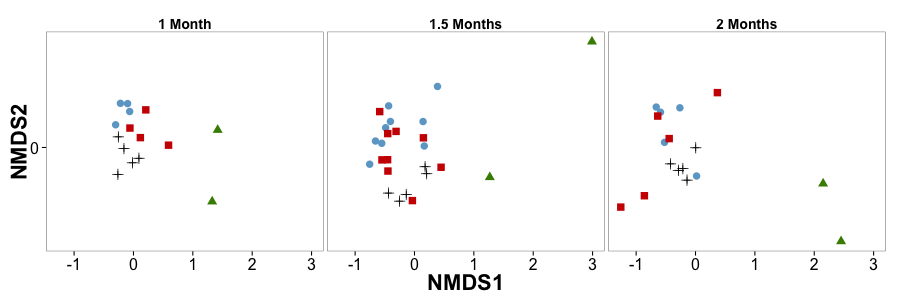

In [10]:
%%R -h 300 -w 900

# Creates an plot object, using the df.sites data, with the x and y axes specified as the PCoA axes,
sample_data(ps_snorm)$MonthName=ifelse(sample_data(ps_snorm)$Month==2.0,"1 Month", ifelse(sample_data(ps_snorm)$Month==2.5,"2 Months","2.5 Months"))

p = plot_ordination(ps_snorm, ord.full, color = "Trtmt", shape = "Trtmt")

# Determines the size of the symbols
p = p  + geom_point(size=3.5) + scale_colour_manual(values=c("skyblue3","chartreuse4","red3","black","gold1"))

p = p + guides(colour = guide_legend("Mineral"), shape = guide_legend("Mineral"))
# Determines the color theme of the plot overall

p = p + scale_x_continuous(breaks=c(-1,0,1,2,3))
p = p + scale_y_continuous(breaks=c(-2,0,2))

p = p + theme_bw() +
    theme(
    legend.position = "none"
    ,plot.background = element_blank()
    ,panel.grid.major = element_blank()
    ,panel.grid.minor = element_blank()
    ,strip.text.x = element_text(size=14, face="bold")
    ,axis.title = element_text(size=22, face='bold')
    ,axis.text = element_text(size=16)
    ,legend.text = element_text(size=16)
    ,legend.title = element_text(size = 22)
    ,strip.background = element_rect(colour="white", fill="white"))

p = p + facet_grid(~MonthName)
# Adds a "facet_wrap" to it, which means it will plot it separately by whatever we specify - here, Days

p

In [11]:
%%R
ggsave(filename="NMDS-ITS-3month.jpg", plot=p ,width=8.5, height=3.5)

I need to calculate similarity distances between all units and see if the values are closer for related microcosms.  
See Soil_Effect notebook. There is not a significant difference detected.

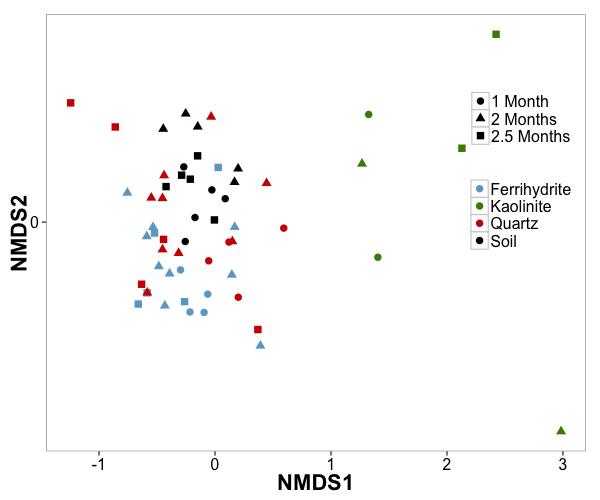

In [9]:
%%R -h 500 -w 600

# Creates an plot object, using the df.sites data, with the x and y axes specified as the PCoA axes,
sample_data(ps_snorm)$MonthName=ifelse(sample_data(ps_snorm)$Month==2.0,"1 Month", ifelse(sample_data(ps_snorm)$Month==2.5,"2 Months","2.5 Months"))

p = plot_ordination(ps_snorm, ord.full, color = "Trtmt", shape = "MonthName")

# Determines the size of the symbols
p = p  + geom_point(size=3.5) + scale_colour_manual(values=c("skyblue3","chartreuse4","red3","black","gold1"))

p = p + guides(colour = guide_legend(""), shape = guide_legend(""))
# Determines the color theme of the plot overall

p = p + scale_x_continuous(breaks=c(-1,0,1,2,3))
p = p + scale_y_continuous(breaks=c(-2,0,2))

p = p + theme_bw() +
    theme(
    #legend.position = "right"
      legend.justification=c(1,1),
      legend.position=c(1,0.9)
    ,plot.background = element_blank()
    ,panel.grid.major = element_blank()
    ,panel.grid.minor = element_blank()
    ,strip.text.x = element_text(size=14, face="bold")
    ,axis.title = element_text(size=22, face='bold')
    ,axis.text = element_text(size=16)
    ,legend.text = element_text(size=16)
    ,legend.title = element_text(size = 22)
    ,strip.background = element_rect(colour="white", fill="white"))

#p = p + facet_grid(~MonthName)
# Adds a "facet_wrap" to it, which means it will plot it separately by whatever we specify - here, Days

p

In [10]:
%%R
ggsave(filename="NMDS-ITS-AllMonths.Argonne.jpg", plot=p ,width=6, height=6)